In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Columns to scale
columns_to_scale = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']

# Normalize the features
scaler = StandardScaler()
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

# Split train dataset into training and validation sets
X = train_df.drop(columns=['price_range'])
y = train_df['price_range']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the datasets
# X_train.shape, X_val.shape, y_train.shape, y_val.shape


In [16]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Error rate")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r", label="Training error rate")
    plt.plot(train_sizes, 1 - test_scores_mean, 'o-', color="g", label="Testing error rate")
    
    plt.legend(loc="best")
    plt.show()

    plt.figure()
    plt.title(title + " - Fit Times")
    plt.xlabel("Training examples")
    plt.ylabel("Fit time (seconds)")
    plt.grid()
    plt.plot(train_sizes, fit_times_mean, 'o-', color="b")
    plt.show()



# Function to plot validation curves
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, scoring="accuracy", n_jobs=2)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    plt.plot(param_range, 1 - train_scores_mean, label="Training error rate", color="r")
    plt.fill_between(param_range, 1 - train_scores_mean - train_scores_std,
                     1 - train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, 1 - test_scores_mean, label="Cross-validation error rate", color="g")
    plt.fill_between(param_range, 1 - test_scores_mean - test_scores_std,
                     1 - test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.show()

Neural Network

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


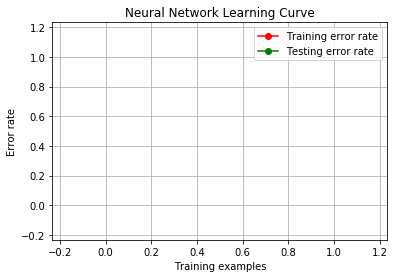

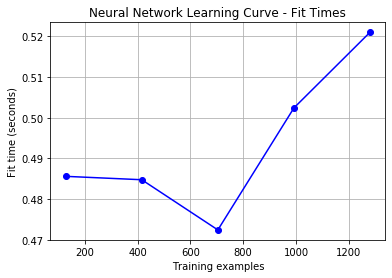

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# Define the neural network architecture
def create_nn_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# history = nn_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping])
nn_estimator = KerasClassifier(build_fn=create_nn_model, input_dim=X_train.shape[1], epochs=100, batch_size=32, verbose=0)

# Plot learning curve for Neural Network
plot_learning_curve(nn_estimator, "Neural Network Learning Curve", X_train, y_train, cv=5)

# Define the epoch parameter
param_range = [10, 20, 50]

# Plot validation curve for the neural network
plot_validation_curve(nn_estimator, "Validation Curve (Neural Network)", X_train, y_train, param_name="epochs", param_range=param_range, cv=5)

SVM

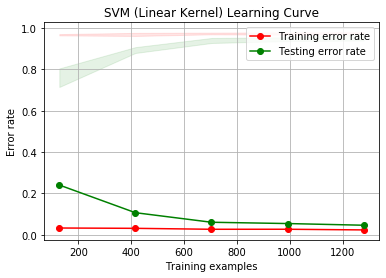

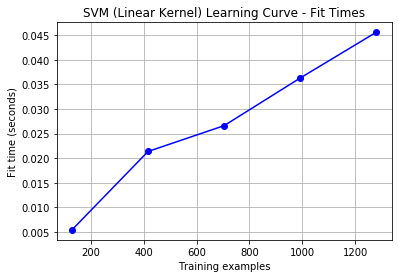

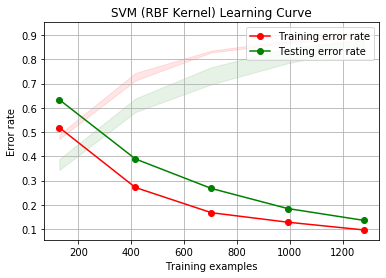

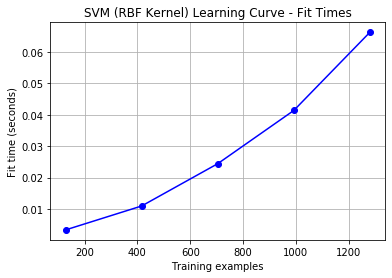

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [7]:
from sklearn.svm import SVC
param_range = [0.1, 1, 10, 100, 1000]

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
plot_learning_curve(svm_linear, "SVM (Linear Kernel) Learning Curve", X_train, y_train, cv=5)


# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
plot_learning_curve(svm_rbf, "SVM (RBF Kernel) Learning Curve", X_train, y_train, cv=5)

# SVM validation curve for C parameter
plot_validation_curve(SVC(kernel='linear', random_state=42), "Validation Curve (SVM Linear)", X_train, y_train, param_name="C", param_range=param_range, cv=5)
plot_validation_curve(SVC(kernel='rbf', random_state=42), "Validation Curve (SVM RBF)", X_train, y_train, param_name="C", param_range=param_range, cv=5)

K-NN

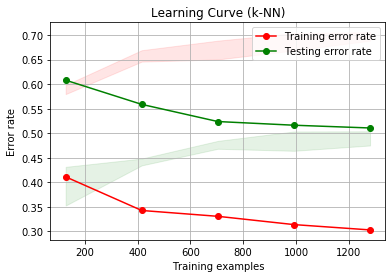

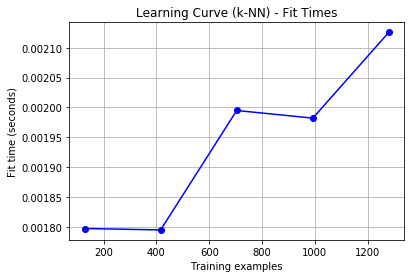

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the models
knn = KNeighborsClassifier()

# Fit the models
knn.fit(X_train, y_train)

# Predict and calculate error rates
# knn_train_error = 1 - accuracy_score(y_train, knn.predict(X_train))
# knn_test_error = 1 - accuracy_score(y_test, knn.predict(X_test))

# Display the error rates
# print("k-NN Train Error:", knn_train_error)
# print("k-NN Test Error:", knn_test_error)


from sklearn.neighbors import KNeighborsClassifier
plot_learning_curve(KNeighborsClassifier(), "Learning Curve (k-NN)", X_train, y_train, cv=5)

# k-NN validation curve for k values
param_range = range(1, 31)
plot_validation_curve(KNeighborsClassifier(), "Validation Curve (k-NN)", X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=5)

Boosting for Decision Trees

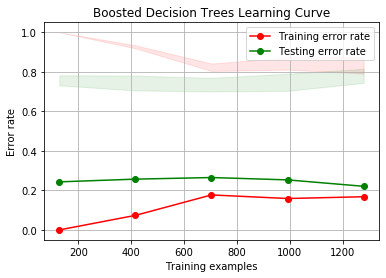

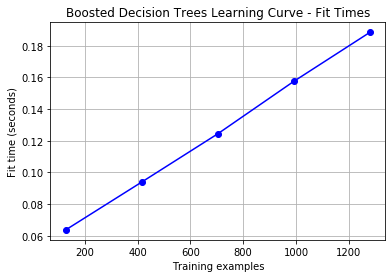

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting for Decision Trees
base_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=5, max_leaf_nodes=10)
boosted_tree = AdaBoostClassifier(base_estimator=base_tree, n_estimators=50)
plot_learning_curve(boosted_tree, "Boosted Decision Trees Learning Curve", X_train, y_train, cv=5)
